$\textbf{Anime recommendation system}$

Accurate and fast tool estimating your grade of unwatched anime.


$\textbf{Motivation}$

You have just finnished ($\textit{wasting time on}$) watching your new favourite anime series... Now it’s the time for the next one! However, there are 29000 different series, each lasting 6 hours on average. Watching all of them
would take you 20 years, so you probably want to somehow choose the best ones. It would be nice to have some accurate tool which helps with it, wouldn’t it?

$\textbf{Problem description}$

We are given some data about animes (tags, past grades) and different target subgroups. We want to develop an accurate and flexible system, which -- basing on the data somehow -- tries to guess how would you grade some anime, which is yet unwatched by you.

It is a classical problem called recommendation problem. We decided to split test data into four different target subgroups defined by some natural conditions and for each subgroup compare some well-known approaches and our own ideas, to answer final research questions:

$\textbf{Research questions}$

1. How important are different parts of data?
2. Can our innovative ideas beat classical ones?

$\textbf{Data}$

We have three sources of data:

1. anime tags (Kaggle CooperUnion/anime-recommendations-database, 43 genres (tags) from 13k series)

Set of simple tags, assigned to animes, which give general information about type of plot.

2. fanarts tags (Danbooru, over 2mln images and 90mln tags)

Set of deeper tags, which are describing more complex aspects of some anime characters presented on fanarts. Each fanart is linked with particular anime, so we can use them as some kind of 

It's quite unique piece of data, since usually in recommendationproblem such tags are rather unavailabe. We use them in our most innovative approach.

3. users' grades (Kaggle CooperUnion/anime-recommendations-database/, 8mln ratings)

Set of triples (user_id, anime_id, its_rating) meaning that user used_id has watched anime_id and rated it, giving grade equal to its_rating. Sometimes its_rating equals -1, which means that anime has been watched, but unrated. We finally deleted -1 ratings, since they turned out to make just mess instead of giving useful information.

This part of data also defines division to target soubgroups. We decided to highlight four:

1. Newbie

Users with no more than 10 animes watched, asking for animes graded at least 10000 times.

2. Popular

Users with no less than 30 animes watched, asking for animes graded at least 5000 times.

3. Connoisseur

Users with no less than 100 animes watched, asking for animes graded at least 20 times.

4. Random

Any user asking for any anime

$\textbf{General questions:}$

$\textbf{1. How accurate is the metod, depending on data distribution?}$

$\textbf{2. How complex is the metod?}$

$\textbf{2. How innovative is the metod?}$

$\textbf{Obvious approaches}$

At the beginnig, to see if more complex machine learning methods make any improvement, we decided to start with two obvious and very basic approaches:

1. Proposed score is mean score for particular anime among all users

2. Proposed score is mean score amnog animes watched previously by particular user

$\textbf{Collaborative filtering}$

This is the first of our ML approaches, probably most classical one. The idea behind it is quite simple: to estimate user's grade, we can look at already given grades from some other users with similar preferences. It requires also just some generally easily accesible data: knowledge about previous scores of each user.

Here come some important questions:

$\textbf{1. How to define two users similarity?}$

$\textbf{2. How many most simliar users is optimal to choose?}$

$\textbf{3. How to exactly estimate our score, after we chose our nearest neighbors?}$



Let's start with the first question. To answer it, we should choose some function, which defines distances between every pair of users. We can use such distances as similarity measure.

How such function such behave? Obviously, the most desirable is the following general property: less distance means more similar preferences. It should be also correctly defined for each pair of possibly compared pair of users, to avoid some technical problems (like dividing by zero). We also wanted to choose something which is quite fast to compute. It actually deosn't have to be metric, which comes to our minds at first - it is enough if it allows to choose some $k$ most similar users to the given one.

After braistorms and research, we decided to compare the following approaches. Each of them focuses on the subset of animes watched by both chosen users. User's grades assigned to them form in natural way a vector and for such pair of vectors we can compute:

$\textbf{1. Reciprocal of number of elements}$

This is our first idea. It is really simple and fast to come with and compute. Our intuituion was that preferences may be guessed looking at commonly watched animes. However, such approach ignores actual grades and also seems to be easly biased by popular series.

$\textbf{2. Sum of squares of differences between elements, divided by number of elements}$

This is improvement of first idea: we can include the information about absolute differences between grades and use it as the main factor of deciding about similar preferences. To avoid favourizing short vectors (which, we balieve, tend more to be randomly biased), we remain division by number of elements.

$\textbf{3. Pearson correlation coefficient}$

Approuch found in some other researchers' papers.

$\textbf{4. Cosine}$

As above, second well-known function.


The second question is also not so obvious to answer. Let's call our wanted parameter $k$. General intuition tells us, that function of error for growing $k$ should be bitonic: at the beginning, error is decreasing, since we are gaining more and more information. However, from some point our information are more and more biased, since we include more and more not so similar users - it leads to increasing error.

So we can think about some ternary search on something like that, but simpler and more cetrain method is to try each $k$ less than some bound.

This leads us to the third question. Knowing which $k$ users are most similar to us, we want to make our final guess. At the beginning on this part, we assumed that we only focus on how users scored some subsets of animes. In particular, we don't want to think now about some direct information about animes themselves (like if they cover similar topics). So, the best option seems to take average score of our desired anime among chosen users.

There are some problems with this approach, however they can be easily solved:

$\textbf{1. It may happen that most of our nearest neighbours haven't watched our anime yet.}$

To solve that issue, after selecting which anime we want to process, we temporary erase from dataset people who haven't watched it yet.

$\textbf{2. The estimation is not an integer}$

In practice it shouldn't be a problem, since for our system it seems enough to just give some approximation - we don't have to simulate exact score.

$\textbf{Content-based filtering}$

The second ML approach. At the first sight, the idea seems to be almost the same. We use KNN again, but look for most similar animes this time. So, the main blackbox algorithm remains the same, but the data processing becomes more tricky. This approach is independent on other users grades. However, it requires additional data to determine similarity of two animes. So, here we got the similar questions:

$\textbf{1. How to define two animes similarity?}$

$\textbf{2. How many most simliar animes is optimal to choose?}$

$\textbf{3. How to exactly estimate our score, after we chose our most similar animes?}$

The first question seems to be little more difficult than in previous problem. We now forget about other users and focus on our selected user's history.
We determine how similar two anime series are, by first using a term frequency–inverse document frequency algorithm where tags are terms and anime series are documents. In other words we translate tags into dimensions of a linear space, place series in this space and in a sense normalize the space. Then we calculate the similarity using KNN, where the more similar series are using the cosine similarity metric, the nearer they are.


The answer for second question is the same as for collaborative filtering.

The third question has also similar answer.

We take mean score of our own scores among K most similar animes watched in both cases (simple and deeper tags).

However, the problem appears when some newbie asks first time for some anime. The own history is empty and without looking at other people, we don't have any information. So, in that case we have to guess with grade $5$, which may be very inaccurate. We are trying to repair it in hybrid approaches.


$\textbf{Methodology of testing}$

At first, we had to decide which method of splitting data for testing and training would be the best. We decided to choose leave-one-out. It is because:

1. It is very easy to temporarly erase one record, do calculations on the rest, and compare answer with expected one.

2. Our core algorithm (KNN) works better for unknown queries when learned on bigger part of dataset available

3. It literally simulates pracitcal conditions - we have all past data available and only one new query comes

Secondly, we had to choose the error function we want to minimize. The best choice seems to be average squared error, since we want to penalize bigger deviations more than smaller.

At the end, we had to decide which part of data should represent each group. The problem is that taking all data satysfing above conditions forces us to do too much calculations.
The idea of dealing with it is simple. For fixed subgroup, let's select random subset of $N$ pairs (user_id, anime_id) from all satysfing subgropup conditions. With growing $N$, it sholud represent these subgroup more and more accurately. But, how to choose reliable $N$?

We decided to try-and-error approach. We checked results for some growing $N$s and waited for error to stabilize. It turned ot that $N = 500$ should be enough for each users' distribution. To be sure, we did our testing on few different samples of size $500$ and obtained very similar results. So finally we left one of these samples. It has the form of four lists with $500$ pairs (user_id, anime_id).



$\textbf{Results}$

We have in total $10$ different approches, for each target subgroup we want to try all of them.

To sum up, our approaches are:

Classic:

1. mean score among all users (MU)
    
2. mean score among all animes watched (MA)

3. CF with Pearson correlation coefficient (CF-P)

4. CF with cosine (CF-C)

5. CBF with simple tags (CBF-S)

Own ideas:

6. CF with reciprocal metric (CF-R)

7. CF with MSE on common grades (CF-MSE)

8. CBF with deeper tags (CBF-D)

9. CBF hybrid (CBF-H)

10. CBF-CF hybrid (B-H)


No handles with labels found to put in legend.


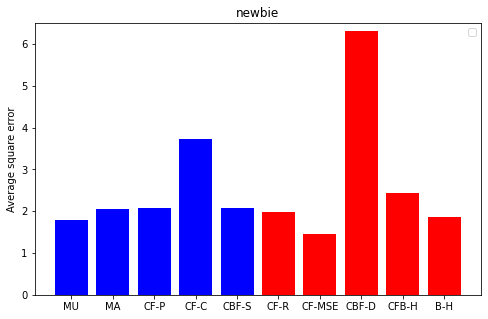

In [12]:
make_plot(0)

No handles with labels found to put in legend.


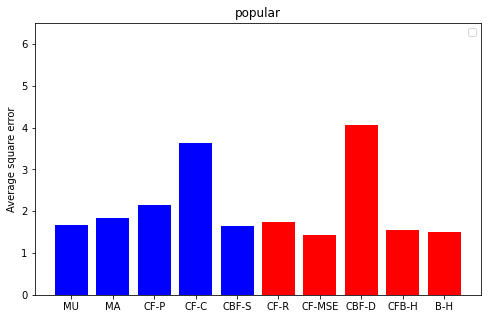

In [13]:
make_plot(1)

No handles with labels found to put in legend.


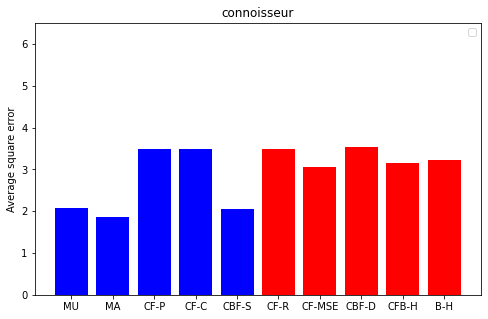

In [14]:
make_plot(2)

No handles with labels found to put in legend.


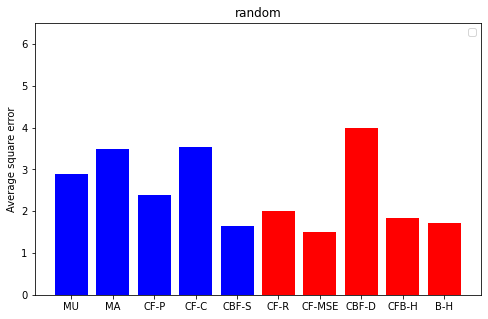

In [15]:
make_plot(3)

$\textbf{Observations from plots}:$

For newbies, we can see that most approaches work similarily well, but CBF-D is noticibly worse. 
This happens, because newbies have watched only a handful of series, 
and so there is not many tags the method can use to accurately predict ratings.

It turns out that the results for popular are very similar to those for newbies. 
It is because in both cases we ask for popular series and, as it turns out,
popular having on average several dozen watched series do not yet differ much from newbies. 

We can see that for connoiseurs content based approach looking at genres is very effective. 
This is because on average every anime series has the same number of genres, 
so connoiseurs, because they watched a lot of anime, can provide a lot of information.
On the other hand, connoiseurs can ask for unpopular series for which there are not many fanarts,
so the deeper tags method will work less accurately. 

For random users, we can see that our methods win with classics, 
especially CF-MSE and hybrid CBF-H have average square errors less than 2.

We can see that our B-H (hybrid between collaborative filtering and content based filtering) 
is quite good in every case, although there is always a method that beats it. Still, it is a good approach
to get relatively good results while not adjusting to a particular subgroup.

$\textbf{Short summary}$

Well working CF-MSE turned out to be also well-known after additional research. Our most innovative approach CFB-D failed, probably due to too less deep tags in dataset. However, hybrid approaches reduced its error to acceptable, placing it not so far from  best ones. For connoisseurs obvious approaches work best!

$\textbf{Conclusions}$

We learned how to deal with really big datasets, we also learned that simple ideas work often great.

Most important: we observed that in our case kind + amount of data available and distribution of test data really matters!​

If we had more time, we would probably experiment with more hybrid approaches. It would be also interesting to test our approaches on other datasets (however, we still need more deep tags to be really innovative) ​